## 데이터 열기

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('./data/imdb.csv', index_col=0)

In [7]:
df.head()

,sentiment
review,
"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
Very little music or anything to speak of.,0
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [8]:
df.shape

(1000, 1)

## TDM 만들기

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(max_features=500, stop_words='english')

In [6]:
tdm = cv.fit_transform(df['review'])

In [7]:
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

## 단어목록

In [8]:
cv.get_feature_names()[:10]

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

## 단어별 총빈도

In [9]:
tdm.sum() #모든 숫자(단어)를 더한 것

3894

In [14]:
word_count= pd.DataFrame({
        '단어':cv.get_feature_names(),
        '빈도':tdm.sum(axis=0).flat #flat은 matrix 형태 늘리는 법
    })

In [15]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58
...,...,...
375,sense,3
377,seriously,3
378,set,3
173,given,3


# 단어 구름 만들기
## wordcloud 설치

In [14]:
#!conda install -y -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.



## 단어구름

In [19]:
from wordcloud import WordCloud

In [20]:
wc= WordCloud(background_color='white', max_words=100, width=400, height=300)

In [27]:
count_dic=word_count.set_index('단어')['빈도'].to_dict()
#count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [28]:
cloud=wc.fit_words(count_dic)

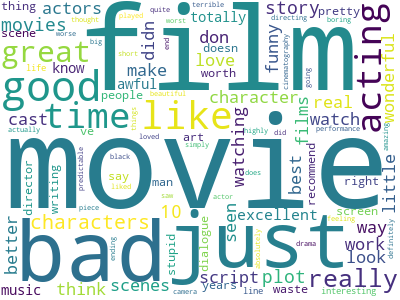

In [29]:
cloud.to_image()

In [61]:
cloud.to_file('cloud.png')

# TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [32]:
tdm=tfidf.fit_transform(df['review'])

In [33]:
word_count = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
})

In [34]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## 기존의 TDM에서 변환하기

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv= CountVectorizer(max_features=500, stop_words='english')

In [37]:
tdm2=cv.fit_transform(df['review'])

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
trans = TfidfTransformer()

In [40]:
tdm3=trans.fit_transform(tdm2)

## 비교

In [41]:
import numpy as np

In [42]:
np.allclose(tdm.A, tdm3.A)

True

# 형태소 분석과 표제어 추출

In [39]:
import spacy

In [40]:
nlp=spacy.load('en_core_web_sm')

In [41]:
text='Wikipedia is maintained by volunteers.'

In [42]:
doc=nlp(text)

In [43]:
for token in doc:
    print(token.text,
         token.lemma_, # 표제어
         token.pos_,   #품사(간략)
         token.tag_,   #품사(자세)
         token.dep_,   #문법적 의존관계
         token.is_stop #불용어 포함여부)
         )

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


In [44]:
spacy.explain('PROPN')

'proper noun'

- 품사: https://universaldependencies.org/u/pos/all.html
- 자세한 영어 품사: https://www.clips.uantwerpen.be/pages/mbsp-tags
- 의존관계: https://universaldependencies.org/u/dep/index.html

## 특정 품사로 단어 문서 행렬 만들기

In [46]:
def extract_nv(text):
    words= []
    doc=nlp(text)
    for token in doc:
        if token.tag_[0] in 'NV': #명사동사만 = NV
            words.append(token.lemma_.lower())
    return words

In [47]:
extract_nv('Apple is a company')

['apple', 'be', 'company']

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv= CountVectorizer(max_features=500,tokenizer=extract_nv)

In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('imdb.csv', index_col=0)

In [52]:
tdm=cv.fit_transform(df['review'])

In [53]:
wc= pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
})

In [54]:
wc.sort_values('빈도', ascending=False)

,단어,빈도
49,be,843
281,movie,211
158,film,189
193,have,119
119,do,112
...,...,...
296,nun,2
298,occupy,2
392,sequel,2
391,sentiment,2
